In [2]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.3 MB/s 
     |████████████████████████████████| 9.8 MB 34.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
from pmdarima.arima import auto_arima

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

In [18]:
data = pd.read_csv("datasets/BRITANNIA.csv")
print(data.head())

         Date     Symbol Series  ...  Trades  Deliverable Volume  %Deliverble
0  2000-01-03  BRITANNIA     EQ  ...     NaN                 NaN          NaN
1  2000-01-04  BRITANNIA     EQ  ...     NaN                 NaN          NaN
2  2000-01-05  BRITANNIA     EQ  ...     NaN                 NaN          NaN
3  2000-01-06  BRITANNIA     EQ  ...     NaN                 NaN          NaN
4  2000-01-07  BRITANNIA     EQ  ...     NaN                 NaN          NaN

[5 rows x 15 columns]


In [19]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.index = data['Date']

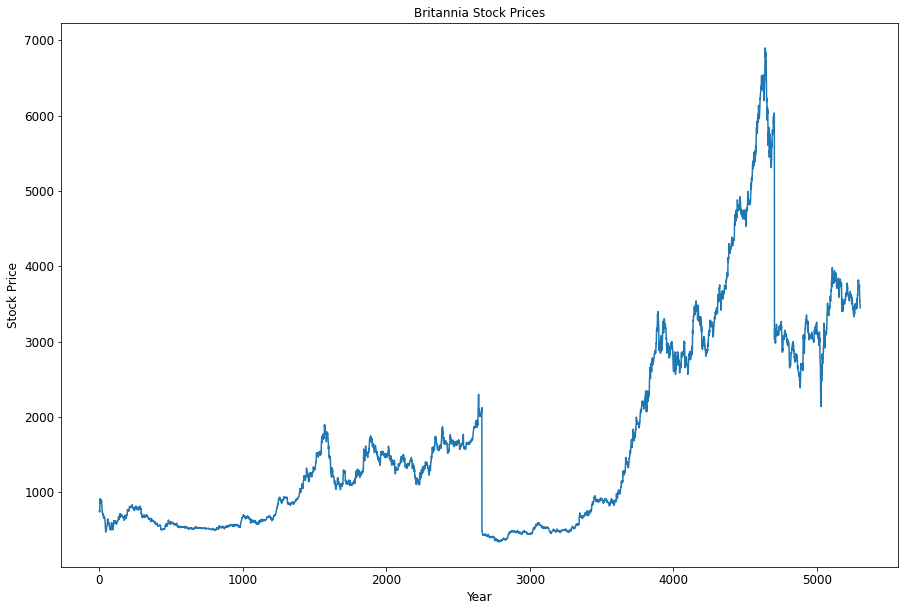

In [10]:
plt.figure(figsize=(15,10))
plt.plot(data['Close'])
plt.title("Britannia Stock Prices")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size=0.2, shuffle=False, random_state=42)

In [12]:
model = auto_arima(X_train["Close"],start_p=1, start_q=1,max_p=5, max_q=5, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=16.73 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=44971.339, Time=0.21 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=43894.067, Time=2.36 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=12.60 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=44973.042, Time=0.19 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=43289.161, Time=4.85 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=18.76 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=6.93 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=43287.507, Time=2.29 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=43892.659, Time=0.78 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=35.30 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=9.57 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=43289.149, Time=4.70 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=39.46 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC

In [22]:
model.fit(X_train["Close"])
forecast = model.predict(n_periods=len(X_test))
forecast = pd.DataFrame(forecast,index = X_test.index,columns=['Prediction'])

In [23]:
print(forecast.head())

             Prediction
Date                   
2017-01-16  2951.530169
2017-01-17  2956.596258
2017-01-18  2963.371765
2017-01-19  2961.390359
2017-01-20  2944.825375


In [25]:
rms=np.sqrt(np.mean(np.power((np.array(X_test['Close'])-forecast['Prediction']),2)))
print(rms)

1267.0158033148405


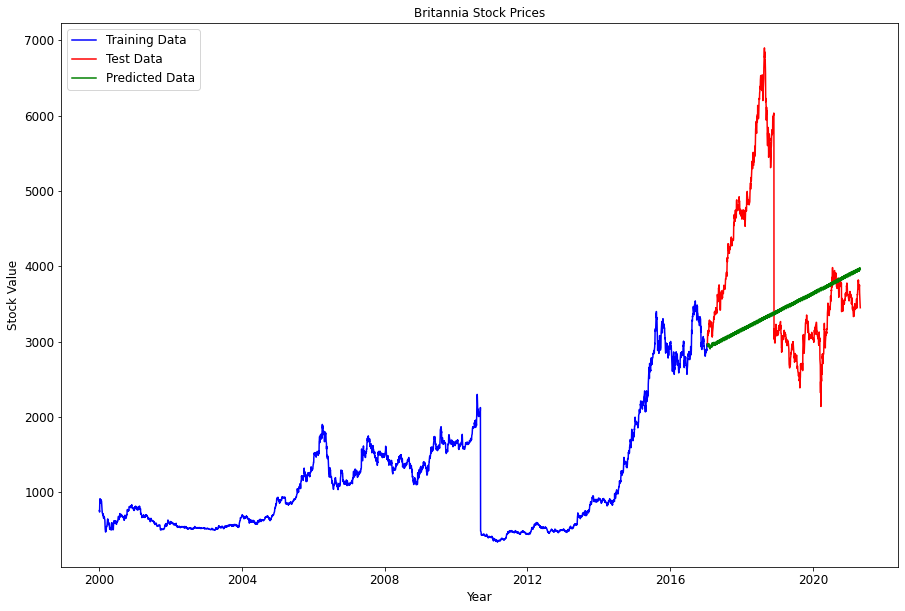

In [28]:
plt.figure(figsize=(15,10))
plt.plot(X_train["Close"], color="blue", label="Training Data")
plt.plot(X_test["Close"], color="red", label="Test Data")
plt.plot(forecast["Prediction"], color="green", label="Predicted Data")
plt.xlabel("Year")
plt.ylabel("Stock Value")
plt.title("Britannia Stock Prices")
plt.legend(prop={'size': 12})
plt.show()